# VGG net 

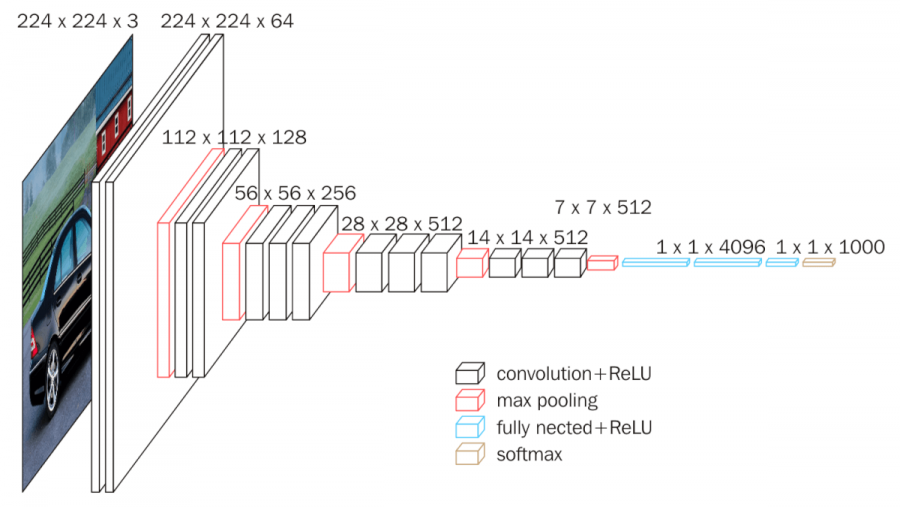

In [7]:
from IPython.display import Image
image_url = 'https://bitbucket.org/hyuk125/lg_dic/raw/12b61c0c3c223378d52ae530da4dc220466e1006/image_day2/VGG.png'
Image(image_url)

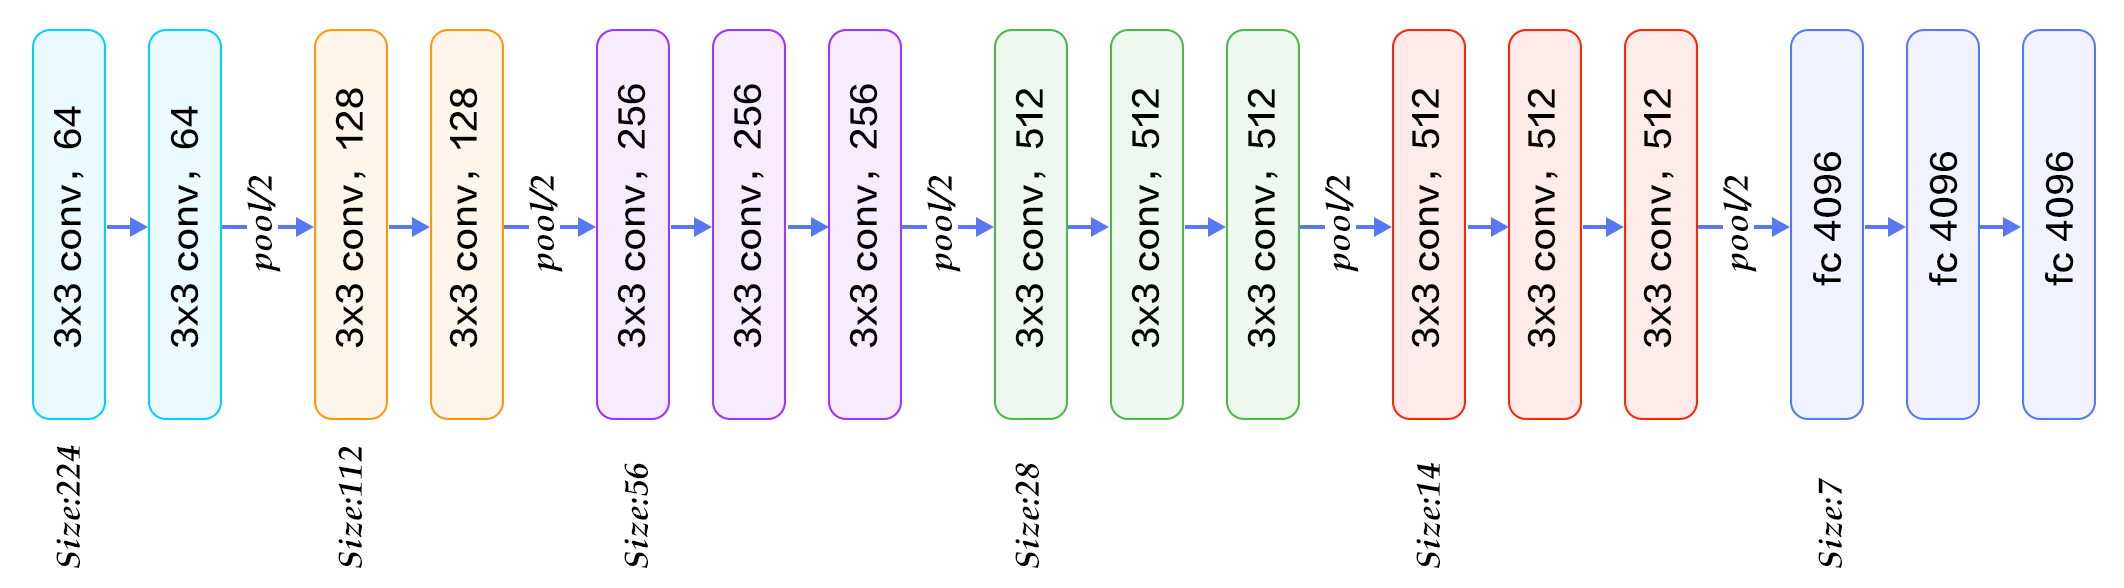

In [10]:
image_url = 'https://bitbucket.org/hyuk125/lg_dic/raw/12b61c0c3c223378d52ae530da4dc220466e1006/image_day2/VGG2.png'
Image(image_url)

In [2]:
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import os

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## CIFAR data import

#### OFFline pickle data

In [ ]:
# def unpickle(file):
#     with open(file, 'rb') as fo:
#         dict = pickle.load(fo, encoding='bytes')
#     return dict
# data = unpickle(os.path.join(os.path.join(path, 'cifar-10-batches-py') ,'/data_batch_1'))

#### Online PIL image data

In [ ]:
# # For online situation
# trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
#                                         download=True, transform=transform)

#### OFFline PIL data

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
path = 'https://bitbucket.org/hyuk125/lg_dic/raw/4350ceab62a7d5d0e22fd9a578b6abe0c6660cec/dataset_day2'
trainset = torchvision.datasets.CIFAR10(root=path, train=True,
                                        download=False, transform=transform)


RuntimeError: ignored

### Make Dataloader

In [ ]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1,
                                          shuffle=True, num_workers=2)

## Define Model 

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

### Original VGG network
\# conv                 : conv(in, out, kernel size=3, padding=1)    
\# conv_2_block(in, out): conv-ReLU-conv-ReLU-MaxPooling   
\# conv_3_block(in, out): conv-ReLU-conv-ReLU-conv-ReLU-MaxPooling 



class Net(nn.Module):

    def __init__(self, base_dim, num_classes=10):
        super(Net, self).__init__()
        self.feature = nn.Sequential(
            conv_2_block(3,base_dim),
            conv_2_block(base_dim,2*base_dim),
            conv_3_block(2*base_dim,4*base_dim),
            conv_3_block(4*base_dim,8*base_dim),
            conv_3_block(8*base_dim,8*base_dim),            
        )
        self.fc_layer = nn.Sequential(
            nn.Linear(8*base_dim * 7 * 7, 4096),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.feature(x)
        x = x.view(x.size(0), -1)
        x = self.fc_layer(x)
        return x
    
net = Net(base_dim=64, num_classes=1000).to(device)

                  

### Our small VGG model  
- input - 32 \* 32 \* 3
- layer1 - 32 \* 32 \* 64 || 32 \* 32 \* 64 || maxpooling
- layer2 - 16 \* 16 \* 128 || 16 \* 16 \* 128 || maxpooling
- layer3 - 8 \* 8 \* 256 || 8 \* 8 \* 256 || maxpooling
- layer4 - Flatten || Fully connected 256 || Full connected 256 || output

## 과제1-1. Small VGG 모델을 작성하시오

In [ ]:
class Net(nn.Module):
    #답변
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    


                  

## Learning the model

In [ ]:
learning_rate = 0.0002

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(net.parameters(), lr = learning_rate)

In [ ]:
epochs = 2

## 과제1-2. 만든 small VGG 모델을 학습시키시오

In [ ]:
for epoch in range(epochs):
    #답변
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
            

## 정확도 판단

#### Test dataset import

In [ ]:
testset = torchvision.datasets.CIFAR10(root=path, train=False,
                                        download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=len(testset),
                                          shuffle=False, num_workers=2)

### Confusion matrix and scores

In [ ]:
test_iter = iter(testloader)
test_x, test_labels = test_iter.next()

In [ ]:
outputs = net(test_x.to(device)))
_, predicted = torch.max(outputs, 1)

#### Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
predicted = predicted.cpu()
print(confusion_matrix(test_labels, predicted))

#### Precision

In [ ]:
from sklearn.metrics import precision_score
print(precision_score(test_labels, predicted, average=None))
print(precision_score(test_labels, predicted, average='weighted'))

#### Recall

In [ ]:
from sklearn.metrics import recall_score
print(recall_score(test_labels, predicted, average=None))
print(recall_score(test_labels, predicted, average='weighted'))